In [ ]:
In this chat I will be working on Drownisess Detection Model 
so I have a folder train and inside it has two folder Closed_Eyes and Open_Eyes contain 2000 images each now 
1. Import all the images 
2. make a deep learning with suitable algorithm 
3. train the model classify if eyes are close or open 
give me code for the training model and save the model 

In [1]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Set paths
train_dir = 'train'
closed_dir = os.path.join(train_dir, 'Closed_Eyes')
open_dir = os.path.join(train_dir, 'Open_Eyes')

# Initialize lists to hold images and labels
images = []
labels = []

# Function to load images from a directory
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (64, 64))  # Resizing to 64x64
        images.append(img)
        labels.append(label)

# Load images for Closed_Eyes and Open_Eyes
load_images_from_folder(closed_dir, 0)  # Label for Closed Eyes is 0
load_images_from_folder(open_dir, 1)    # Label for Open Eyes is 1

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Normalize pixel values (0-1)
images = images / 255.0

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [2]:
# Define the CNN model
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the layers
model.add(Flatten())

# Fully Connected Layer 1
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# Fully Connected Layer 2 (Output Layer)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

C:\Users\YASHRAJ MISHRA\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         589,952 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 683,329 (2.61 MB)

 Trainable params: 683,329 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Using data augmentation for training
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10


C:\Users\YASHRAJ MISHRA\AppData\Roaming\Python\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 16s 108ms/step - accuracy: 0.7162 - loss: 0.5150 - val_accuracy: 0.9737 - val_loss: 0.0944
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9324 - loss: 0.1849 - val_accuracy: 0.9925 - val_loss: 0.0446
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9607 - loss: 0.1255 - val_accuracy: 0.9887 - val_loss: 0.0299
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9702 - loss: 0.0776 - val_accuracy: 0.9937 - val_loss: 0.0155
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 102ms/step - accuracy: 0.9734 - loss: 0.0763 - val_accuracy: 0.9950 - val_loss: 0.0141
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 104ms/step - accuracy: 0.9793 - loss: 0.0644 - val_accuracy: 0.9975 - val_loss: 0.0108
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9830 - loss: 0.0574 - val_accuracy: 0.9975 - val_loss: 0.0057
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 11s 103ms/step - accuracy: 0.9797 - loss: 0.0554 - val

In [4]:
# Save the model
model.save('drowsiness_detection_model.h5')

print("Model saved as 'drowsiness_detection_model.h5'")

Model saved as 'drowsiness_detection_model.h5'


25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


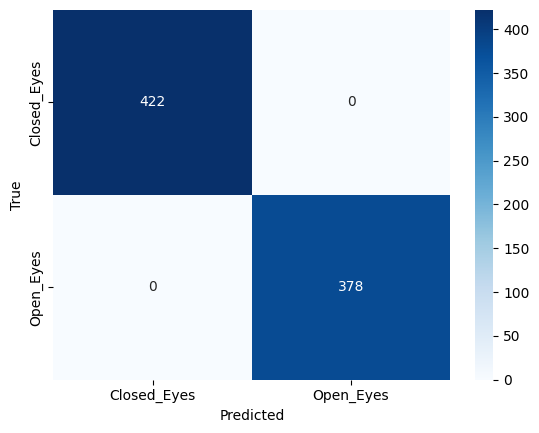

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Closed_Eyes', 'Open_Eyes'], yticklabels=['Closed_Eyes', 'Open_Eyes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()